In [1]:
# Setup Imports
import numpy as np
import matplotlib.pyplot as plt

# Loading Results from OL2.py Application outputs
results = [{
        "title":"Cifar10",
        "relu": np.loadtxt("cifar10-resnet-relu.txt"),
        "gelu": np.loadtxt("cifar10-resnet-gelu.txt"),
    },{
        "title":"Cifar100",
        "relu": np.loadtxt("cifar100-resnet-relu.txt"),
        "gelu": np.loadtxt("cifar100-resnet-gelu.txt"),
    }]


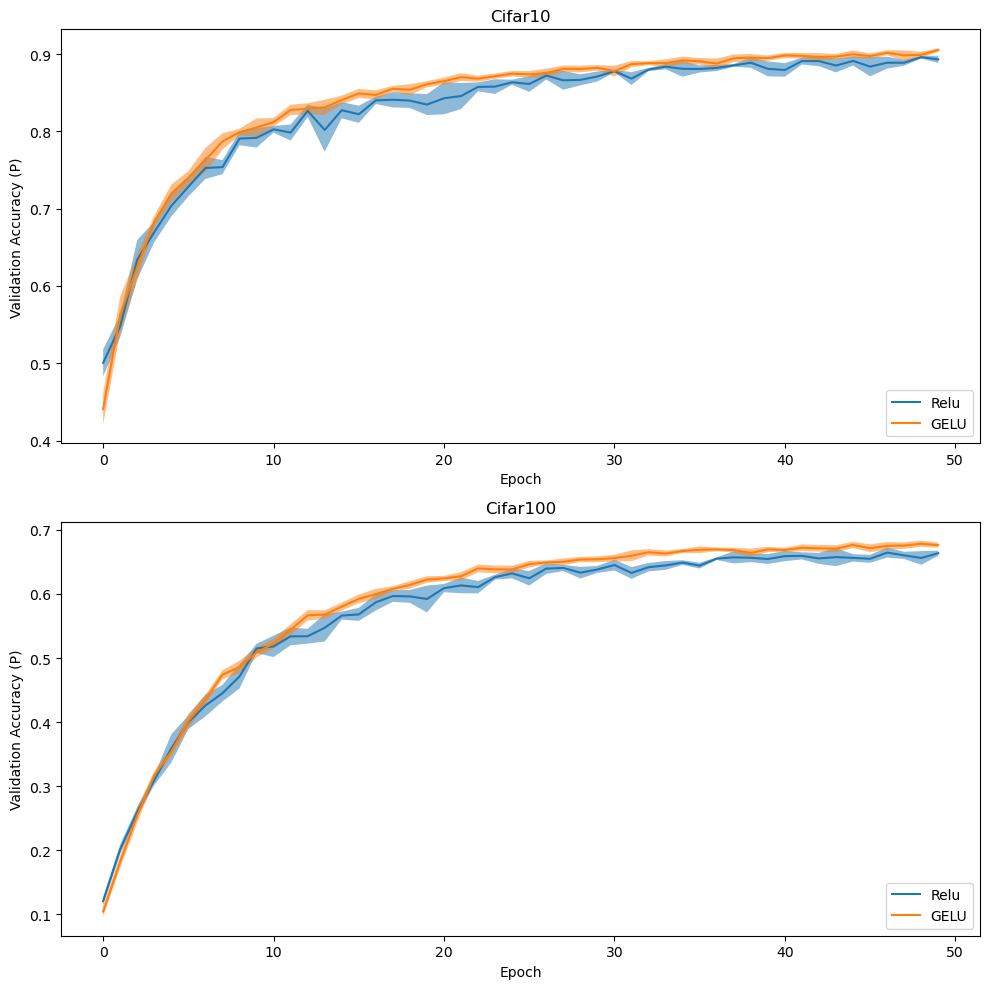

In [2]:
# Create a 2x2 grid for the Plots (subplots)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Default Values for all Plots
for i, axis in enumerate(axes.ravel()):

    # Setup Data Layers for Plots
    axis.set_title(results[i]["title"])

    # Setup Relu
    data = results[i]["relu"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='Relu')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # Setup GELU
    data = results[i]["gelu"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='GELU')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # General Setting and UI configs that are the same on each Plot
    axis.set_ylabel('Validation Accuracy (P)')
    axis.set_xlabel('Epoch')
    axis.legend(loc='lower right') 

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Ansers to OL3 Questions:

## Answer 1
The **GELU** performed slighly better than the ReLU on both the Cifar10 and Cifar100.

## Answer 2
There seems to be a smoothness to GELU, which int urn would indicate that the learing rate would be smoother and hence converge faster. I'm guessing this also by my thoghts would thenhelp the gradient, which in turn is better for backwards propogation. 

## Answer 3
Althought I feel that the learning and convergence of the GELU is really good, I could try and use other otimizers for this expereiment. As an examample I could use the **RMSProp** which adjusts the learning rate on the parameters. This might allows me to adjust teh learning rates differently than on the **ADAM** optimizer I used.

## Answer 4
I'm thinking if I change to the **RMSProp** I might getter faster convergence and might not need as many epochs to achieve the **85-90%** accuracy on the Cifar10 and the **60-65%** accuracy on the Cifar100.

## Answer 5
I would run my models with **RMSProp** wiht teh current learning rate of `lr=0.001` and `weight_decay=1e-4` on **RMSProp** and graph it on the same polts as above. I would then also modify the learning rate **up** by `0.001` to `lr=0.002` and re-run the expereiment and graph it onto the plots to see how the convergence reacts to the new learning rate.

## Answer 6
I am still not quite clear on the following below:
```
# Linear projection - learned upsampling
self.projection = torch.nn.ConvTranspose2d(3,3,
                                           (4,4), # 8x
                                           (4,4)) # 8+
```
and why this works or is used on this lab expereiment.

## Answer 7
I think as a whole the **Bottleneck** are the area that might be useful to take more time in.
